In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from pandas.core import datetools

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

data = pd.read_csv('nba_2017_players_stats_combined.csv')
data.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


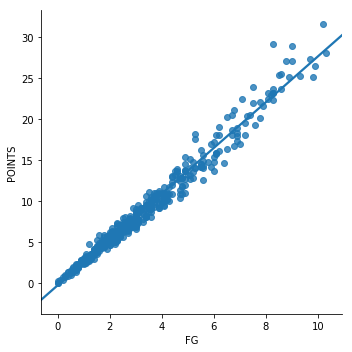

In [68]:
sns.lmplot(x='FG', y='POINTS', data=data, ci=None)

In [69]:
#The player with a higher FT%(>=50), we could see he can shooting accurately. 
data['FT%']=data['FT%'].replace(data['FT%'][data['FT%']>=0.5], 1)
data['FT%']=data['FT%'].replace(data['FT%'][data['FT%']<0.5], 0)
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 

In [70]:
data.isnull().sum()

Unnamed: 0    0
Rk            0
PLAYER        0
POSITION      0
AGE           0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
POINTS        0
TEAM          0
GP            0
MPG           0
ORPM          0
DRPM          0
RPM           0
WINS_RPM      0
PIE           0
PACE          0
W             0
dtype: int64

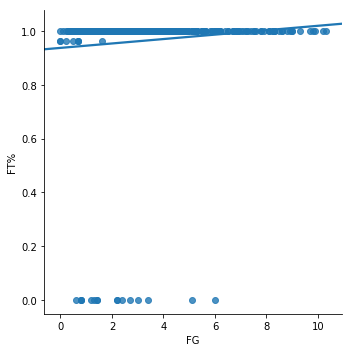

In [71]:
sns.lmplot(x='FG', y='FT%', data=data, ci=None)

In [72]:
# Adding intercept manually
data['intercept'] = 1.0
pred=['FG','intercept']
pred

['FG', 'intercept']

In [36]:
data

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,intercept
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,1.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,1.0
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,1.0
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,1.0
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47,1.0
5,5,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,1.0
6,6,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,1.0
7,7,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,1.0
8,8,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,...,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,1.0
9,9,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,...,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,1.0


In [46]:
data.std()

Unnamed: 0    128.893367
Rk            138.538867
AGE             4.389109
MP              8.901904
FG              2.154721
FGA             4.531228
FG%             0.088682
3P              0.752460
3PA             1.946558
3P%             0.125041
2P              1.804141
2PA             3.470535
2P%             0.095325
eFG%            0.086295
FT              1.463253
FTA             1.770097
FT%             0.186123
ORB             0.771957
DRB             1.821955
TRB             2.459761
AST             1.801321
STL             0.406748
BLK             0.410010
TOV             0.789567
PF              0.718137
POINTS          6.083742
GP             23.258955
MPG             8.902012
ORPM            1.957094
DRPM            1.557775
RPM             2.430829
WINS_RPM        3.662573
PIE             3.678551
PACE            2.967010
W              15.060024
intercept       0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c6278d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1cb792b0>]], dtype=object)

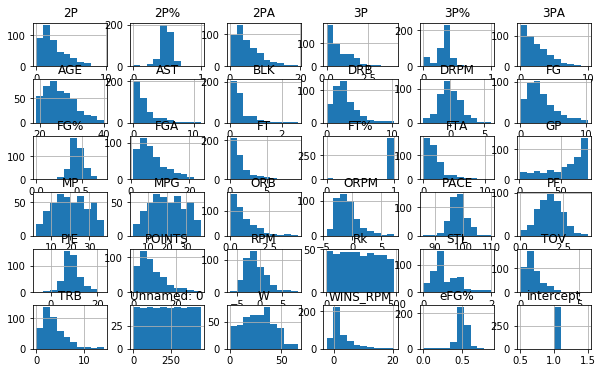

In [47]:
data.hist()

In [48]:
#  Tabulating whether or not one player has higher FT%
pd.crosstab(data['FT%'], data['FG'], rownames=['FT%'])

FG,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,8.6,8.8,8.9,9.0,9.3,9.7,9.8,9.9,10.2,10.3
FT%,,,,,,,,,,,,,,,,,,,,,
0.00000,0,0,0,0,0,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
0.96347,2,0,1,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1.00000,1,1,1,3,3,4,3,9,4,8,...,2,1,1,2,1,1,1,1,1,1


In [41]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
model = sm.Logit(data['FT%'], data[pred]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.149849
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FT%   No. Observations:                  446
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                 0.03189
Time:                        18:07:30   Log-Likelihood:                -66.833
converged:                       True   LL-Null:                       -69.034
                                        LLR p-value:                   0.03587
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG             0.3260      0.167      1.949      0.051      -0.002       0.654
intercept      2.4078      0.447      5.383      0.000       1.531       3.285
==============================================================================
"""

* Is the relationship significant?  
The output indicates that FG is significantly associated with the FT% (p = 0.051). 
The output also provides the coefficients for Intercept = 2.4078 and FG = 0.3260.

* Are any model assumptions violated?
The residuals in mathematical statistics refer to the difference between the actual observed value and the estimated value (fitting value). If the regression model is correct, we can think of the residual error as the observed value of the error.
It should conform to the assumptions of the model and have some properties of error.

* Cross-validate the model. How well did it do?

In [42]:
model.conf_int()

,0,1
FG,-0.001833,0.653876
intercept,1.531122,3.284570


In [43]:
model.conf_int(alpha=0.01)

,0,1
FG,-0.104852,0.756895
intercept,1.255636,3.560057


In [44]:
np.exp(model.params)

FG            1.385445
intercept    11.110006
dtype: float64

Use the index of each variable coefficient to generate the odds ratio and we can known how much the increase of each unit or the decrease of the FG can influence the FT%.

In [45]:
# odds ratios and 95% CI
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
FG,0.998169,1.922979,1.385445
intercept,4.623362,26.697502,11.110006


In [73]:
#CROSS VALIDATION
target = data['FG']
data = data[['FT%','FG%']]
target = target.values
data = data.values

In [103]:
X = np.array([np.concatenate((v,[1])) for v in data])
import numpy as np
y = np.asarray(target, dtype="|S6")

In [104]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [105]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)

In [106]:
for train,test in kf:
    print (train)
    print (test)

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

Text(0.5,1,'FT% vs FG: $Y_i$ vs $\\hat{y}_i$')

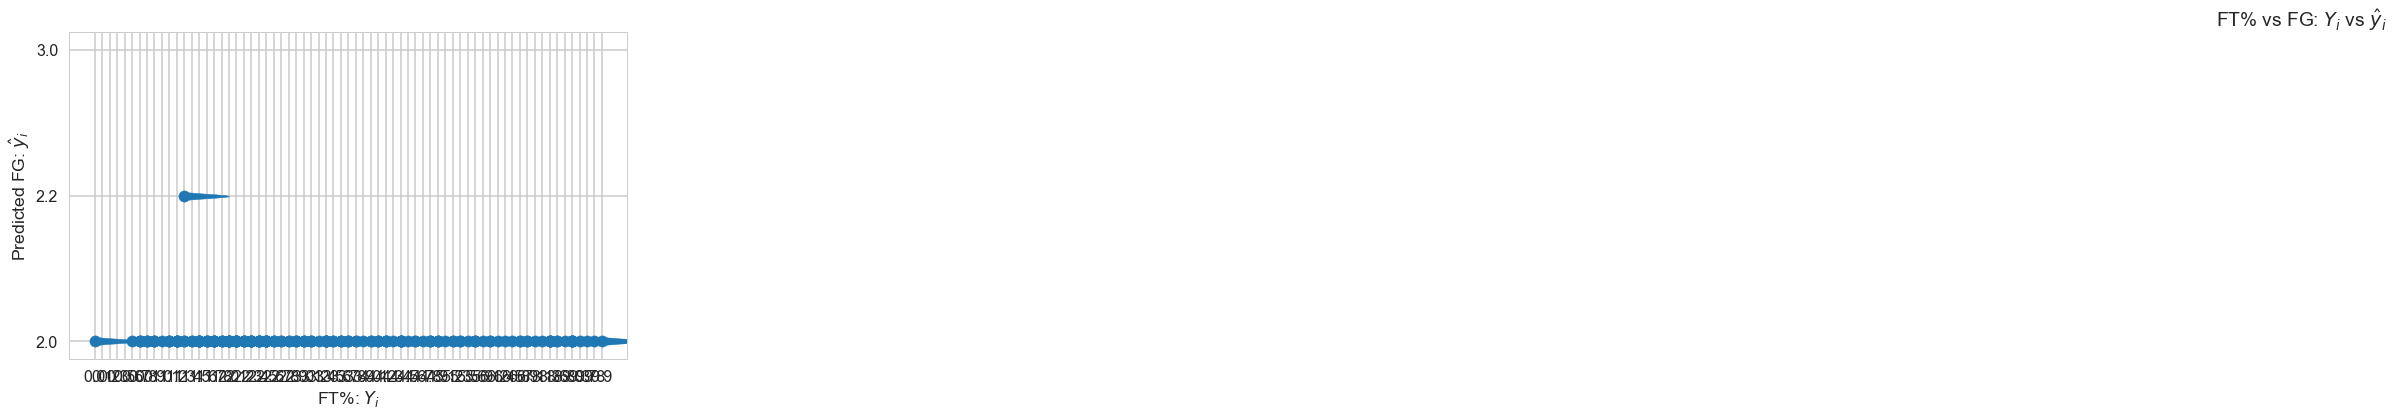

In [107]:
# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("FT%: $Y_i$")
plt.ylabel("Predicted FG: $\hat{y}_i$")
plt.title("FT% vs FG: $Y_i$ vs $\hat{y}_i$")

In [109]:
print (logreg.intercept_)
print (logreg.coef_)

[-1.36866248 -1.42072597 -1.36997183 -1.35234509 -1.28778355 -1.20956627
 -1.01319692 -1.35520762 -1.35800011 -1.22412229 -1.39471993 -1.30211207
 -0.99124534 -1.29977656 -1.33642741 -1.41983525 -1.26305328 -1.3175504
 -1.5825297  -1.59378876 -1.15556945 -1.42788003 -0.98701403 -1.33389631
 -1.11845611 -1.32556948 -1.43337146 -1.16983819 -1.33975366 -1.45344976
 -1.03236223 -1.41075839 -1.49858396 -1.3916471  -1.44338609 -1.36430234
 -1.29235068 -1.41895287 -1.50003867 -1.35831326 -1.45136154 -1.34709572
 -1.59407221 -1.50105452 -1.58320889 -1.49654838 -1.37320515 -1.52884987
 -1.3585717  -1.58970202 -1.32370669 -1.6119163  -1.50206782 -1.40251248
 -1.53703989 -1.58532495 -1.58984315 -1.21272229 -1.50812946 -1.50105452
 -1.58786788 -1.44727127 -1.5069701  -1.60114773 -1.50987564 -1.5895609
 -1.58939986 -1.50929273 -1.58855411 -1.50740438 -1.59208801 -1.58518462
 -1.5960554  -1.58855411 -1.5983323  -1.58786788]
[[-1.04242342 -1.4788629  -1.36866248]
 [-1.0458712  -1.20009155 -1.42072597